# Bisection Search Algorithm for Finding the Square Root

In mathematics, the bisection algorithm is a simple method for approximating the roots of one-dimentional functions. It is also known as the interval halving method or the binary search method.

In this case, the function is the  square root of a positive real number.

Since for many numbers (e.g. 2), the solution is not a rational number, there is no way to precisely represent it as a finite string of digits. We will look for an approximation.

In this case, the bisection search algorithm start with a range that is known to contain the solution. For example, if we want to find the square root of 5, we know that the range (0,5) contains the square root of 5.

We arbitrarily try with the midpoint, in this case 2.5, and check how far 2.5^2 is from the solution. 

$$2,5^2 = 6.5 > 5$$

Okay, that was not a good approximation, since we have an error of 1.5.

Now, after one step, we know that the solution lies between 0 and 2.5. Our search space is divided in half. We repeat the previous step:

1. Find the midpoint c
2. Calculate the function value at the midpoint$$f(c) = c^2$$
3. Check if the error is sufficiently small (satisfactory) or not: $$f(c) - a$$ where a is the value whose square root we are trying to approximate.
4. If the error is sufficiently small, return c, otherwise, iterate again from step 1.

Below, we implement this method in Python. 

References:
- Guttag "Introduction to Computation and Programming Using Python" pp. 33
- Wikipedia "Bisection method" at https://en.wikipedia.org/wiki/Bisection_method
- Peng, Roger "Advanced Statistical Computing", section 2.1 Bisection Algorithm at https://bookdown.org/rdpeng/advstatcomp/bisection-algorithm.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def square_root(target: float, max_error = 0.0001):
    """ Function for finding the square root of a positive number, returns an approximation of the square root of the target """
    # TODO: Check conditions: target > 0
    low: float = 0 # low and high define the search interval
    high: float = target
    attempt: float = (low + high) / 2 # find the midpoint of the search interval.
    while abs(attempt ** 2 - target) > max_error: # check if the approximation is good enough.
        if attempt**2 > target: # if the approximation is too high, use the midpoint as upper limit for the new search interval.
            high = attempt
        else: # if the approximation is too low, use the midpoint as new lower limit for the search interval.
            low = attempt
        attempt = (low + high)/2
    return attempt # if the approximation is good enough, return it


In [13]:
# sanity check
print(square_root(5))
print(square_root(5) ** 2)

2.2360610961914062
4.999969225900713


2.2360610961914062
4.999969225900713
iterations [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 0, 1.25, 1.875, 2.1875, 2.1875, 2.1875, 2.2265625, 2.2265625, 2.2265625, 2.2314453125, 2.23388671875, 2.235107421875, 2.2357177734375, 2.23602294921875, 2.23602294921875, 2.23602294921875]
[5, 2.5, 2.5, 2.5, 2.5, 2.34375, 2.265625, 2.265625, 2.24609375, 2.236328125, 2.236328125, 2.236328125, 2.236328125, 2.236328125, 2.236328125, 2.236175537109375, 2.2360992431640625]


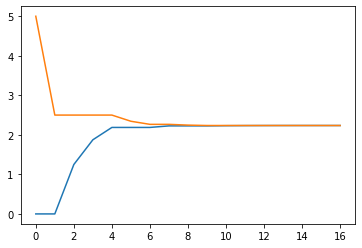

In [14]:
X = 5
FFLOW = 0
FFHIGH = X
LAMBDA = 0.0001
ATTEMPT = (FFLOW + FFHIGH)/2
#print(ATTEMPT**2 - X)
iteration = 0
ITERATIONS = [0] # TODO: convert to numpy
FFLOWS = [FFLOW] # TODO: convert to numpy
FFHIGHS = [FFHIGH] # TODO: convert to numpy
while abs(ATTEMPT**2 - X) > LAMBDA:
    #print(f'error ={ATTEMPT**2 - X}')
    if ATTEMPT ** 2 > X:
        FFHIGH = ATTEMPT
    else:
        FFLOW = ATTEMPT
    FFLOWS.append(FFLOW)
    FFHIGHS.append(FFHIGH)
    iteration += 1
    ITERATIONS.append(iteration)
    ATTEMPT = (FFLOW + FFHIGH)/2
print(ATTEMPT)
print(ATTEMPT**2)
print(f'iterations {ITERATIONS}')
print(FFLOWS)
print(FFHIGHS)
fig, ax = plt.subplots()
plt.plot(ITERATIONS,FFLOWS)
plt.plot(ITERATIONS,FFHIGHS)
plt.show()

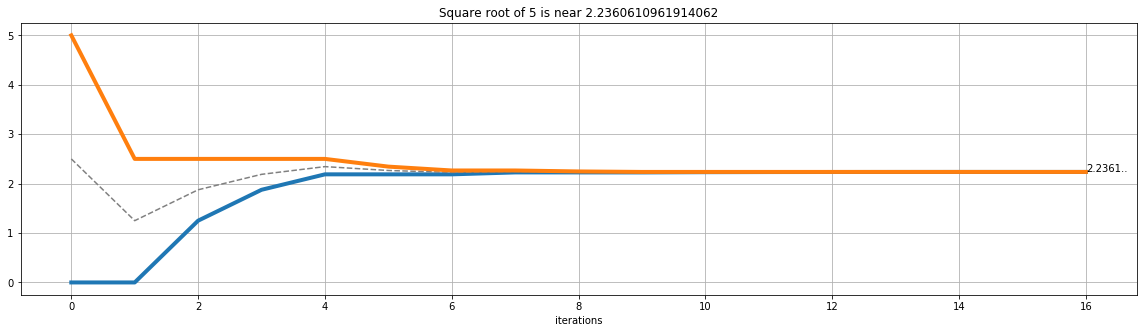

In [181]:
def square_root_plot(target: float, max_error = 0.0001, ax=ax):
    """ Function for finding the square root of a positive number, returns an approximation of the square root of the target 
    and a plot that shows how the search range converges. """
    # TODO: Check conditions: target > 0
    low: float = 0 # low and high define the search interval
    high: float = target
    attempt: float = (low + high) / 2 # find the midpoint of the search interval.
    iteration = 0
    iterations: list = np.array([0])
    lows: np.array = np.array([low])
    attempts: np.array = np.array([attempt])
    highs: np.array = np.array([high])
    while abs(attempt ** 2 - target) > max_error: # check if the approximation is good enough.
        if attempt**2 > target: # if the approximation is too high, use the midpoint as upper limit for the new search interval.
            high = attempt
        else: # if the approximation is too low, use the midpoint as new lower limit for the search interval.
            low = attempt
        iteration += 1
        attempt = (low + high)/2
        iterations = np.append(iterations,iteration)
        lows = np.append(lows,low)
        attempts = np.append(attempts,attempt)
        highs = np.append(highs,high)
    # return (attempt,fig) # if the approximation is good enough, return it
    line, = ax.plot(iterations,lows,linewidth=4) # add a line showing the search interval's lower bound per iteration
    line, = ax.plot(iterations,attempts, color='grey',linestyle='dashed') # add a line showing the midpoints per iteration
    line, = ax.plot(iterations,highs,linewidth=4) # add a line showing the search interval's upper bound per iteration
    plt.text(iteration,attempt,f'{attempt:.4f}..')
    ax.grid() # Turn on the grid
    ax.set_title(f'Square root of {target} is near {attempt}')
    ax.set_xlabel('iterations')
    return(line)
fig, ax = plt.subplots(figsize=(20,5))
square_root_plot(5,ax=ax)
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
16
[2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062]


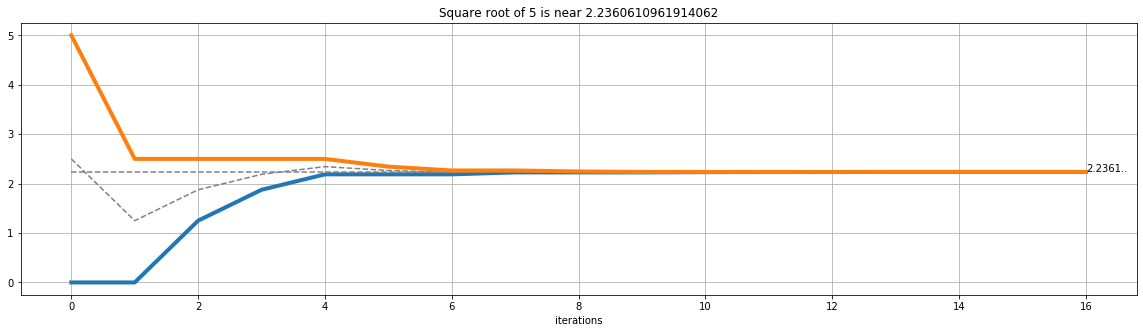

In [177]:
fig, ax = plt.subplots(figsize=(20,5))
square_root_plot(5,ax=ax)
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
13
[1.4141845703125, 1.4141845703125, 1.4141845703125, 1.4141845703125, 1.4141845703125, 1.4141845703125, 1.4141845703125, 1.4141845703125, 1.4141845703125, 1.4141845703125, 1.4141845703125, 1.4141845703125, 1.4141845703125, 1.4141845703125, 1.4141845703125, 1.4141845703125]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
16
[2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062, 2.2360610961914062]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
18
[3.872995376586914, 3.872995376586914, 3.872995376586914, 3.872995376586914, 3.872995376586914, 3.872995376586914, 3.872995376586914, 3.872995376586914, 3.872995376586914, 3.872995376586914, 3.872995376586914, 3.872995376586914, 3.8729953765

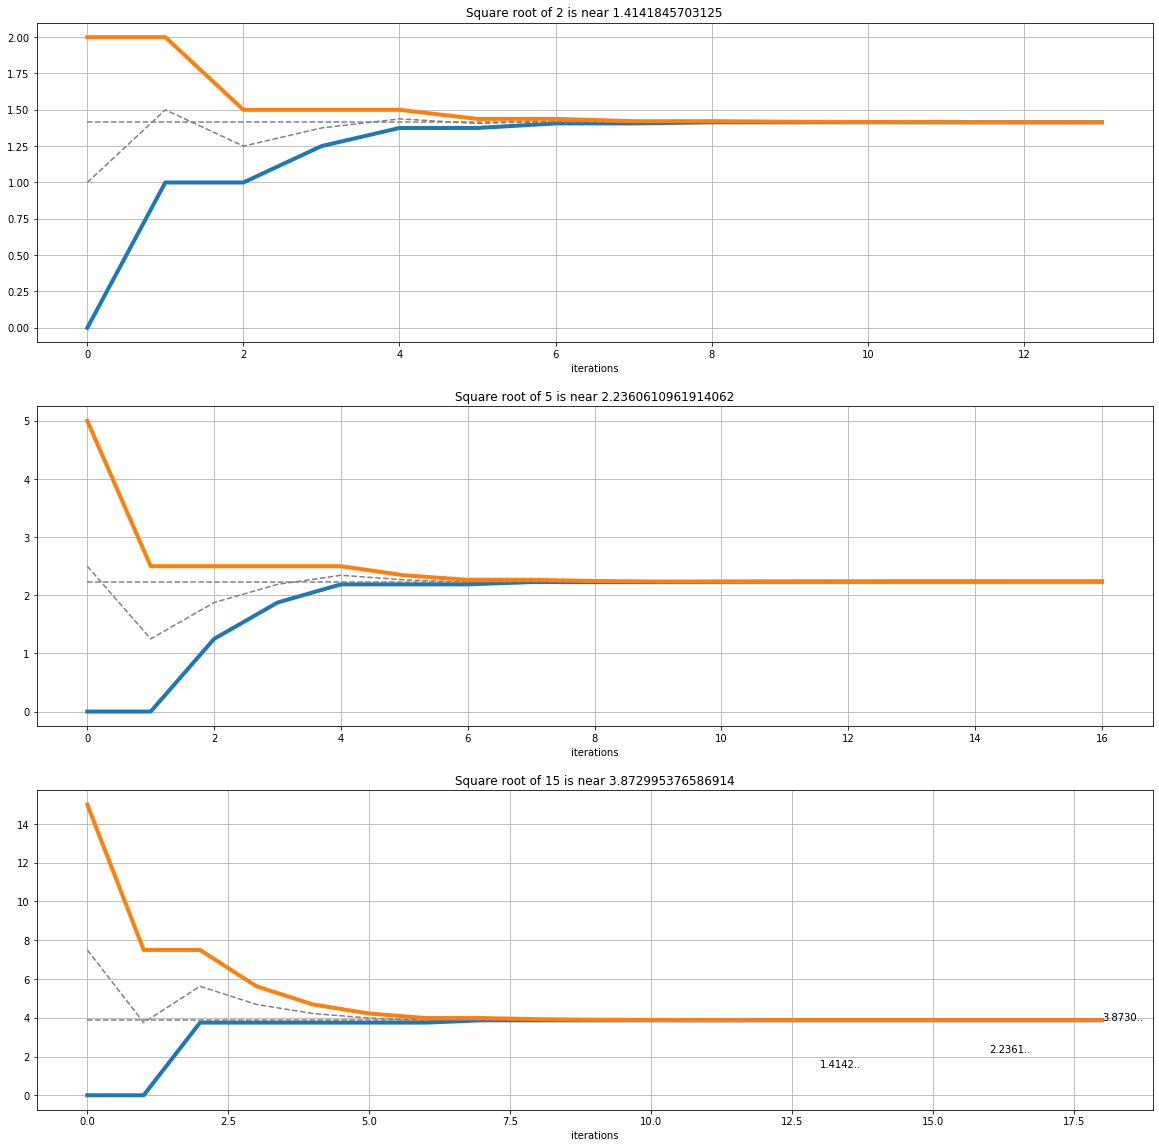

In [178]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(20,20),nrows=3)
square_root_plot(2,ax=ax1)
square_root_plot(5,ax=ax2)
square_root_plot(15,ax=ax3)
plt.show()